<a href="https://colab.research.google.com/github/abiramimariappan7/week-1-e-waste/blob/main/ewaste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf  # Core TensorFlow library


In [ ]:
from tensorflow.keras import layers, models, optimizers, callbacks  # Layers, model creation, optimizers, and training callbacks

from tensorflow.keras.models import Sequential, load_model  # For sequential model architecture and loading saved models

from tensorflow.keras.applications import EfficientNetV2B0  # Pretrained EfficientNetV2B0 model for transfer learning

from tensorflow.keras.applications.efficientnet import preprocess_input  # Preprocessing function specific to EfficientNet


In [ ]:
import numpy as np  # Numerical operations and array handling

import matplotlib.pyplot as plt  # Plotting graphs and images

import seaborn as sns  # Plotting graphs and images

from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for classification models


In [ ]:
import gradio as gr  # Web interface library to deploy and test ML models

from PIL import Image  # For image file loading and basic image operations

In [ ]:
testpath= r'C:\Users\Edunet Foundation\Downloads\project\E waste data\modified-dataset\test'
trainpath= r'C:\Users\Edunet Foundation\Downloads\project\E waste data\modified-dataset\train'
validpath = r'C:\Users\Edunet Foundation\Downloads\project\E waste data\modified-dataset\val'

In [ ]:
# Install TensorFlow package
!pip install tensorflow

In [32]:
from google.colab import files
uploaded = files.upload()


Saving E-Waste classification dataset.zip to E-Waste classification dataset.zip


In [33]:
import zipfile
import os

# Replace 'your_file.zip' with your actual file name
zip_path = 'E-Waste classification dataset.zip'
extract_folder = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Extracted files:")
print(os.listdir(extract_folder))


Extracted files:
['modified-dataset']


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    extract_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    extract_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2400 images belonging to 1 classes.
Found 600 images belonging to 1 classes.


In [35]:
import os

# List main folders inside the dataset
for folder in os.listdir(extract_folder):
    print(folder)
    sub_path = os.path.join(extract_folder, folder)
    if os.path.isdir(sub_path):
        print("  Subfolders / files:", os.listdir(sub_path)[:5])  # Show first 5 items


modified-dataset
  Subfolders / files: ['train', 'val', 'test']


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create generators without validation split
datagen = ImageDataGenerator(rescale=1./255)

# Define directories
train_dir = os.path.join(extract_folder, 'modified-dataset', 'train')
val_dir = os.path.join(extract_folder, 'modified-dataset', 'val')
test_dir = os.path.join(extract_folder, 'modified-dataset', 'test')

# Create image generators
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [38]:
# Get class names from train_data
class_names = list(train_data.class_indices.keys())

# Print number of classes
print(len(class_names))  # Number of classes

# Print class names
print(class_names)       # List of class names


10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


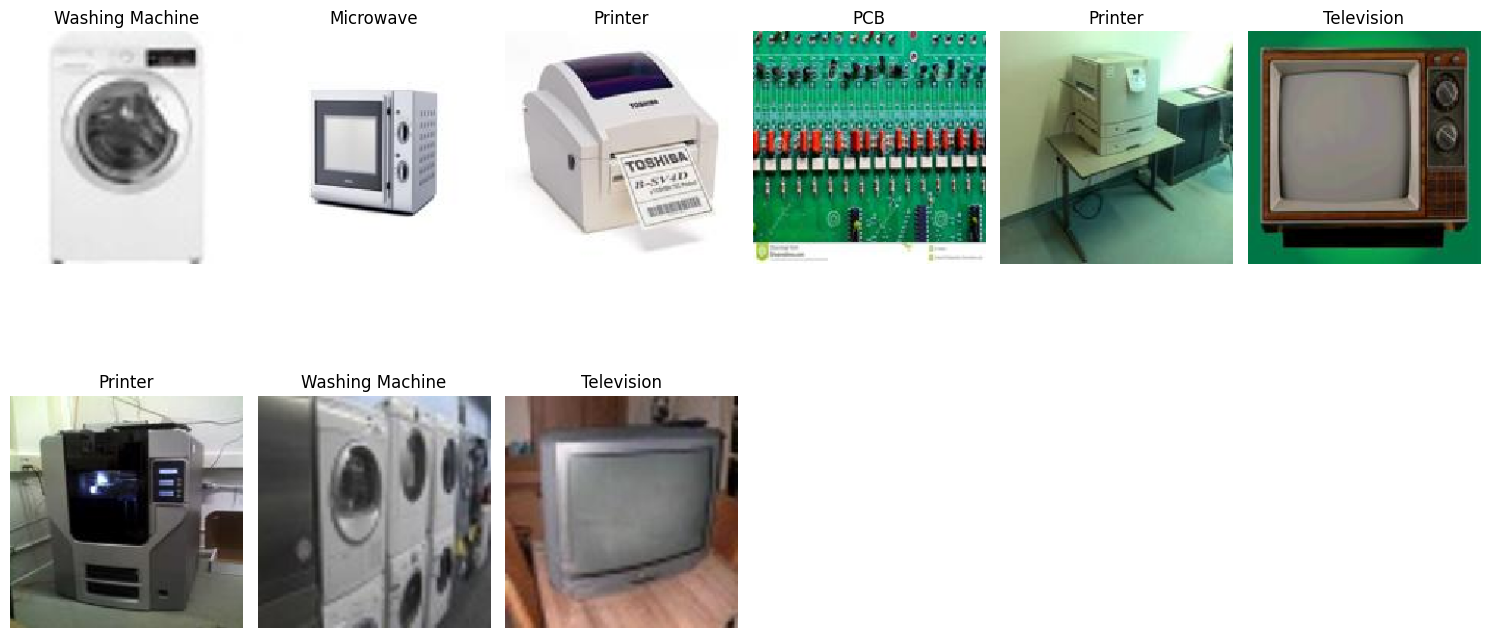

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Get class names
class_names = list(train_data.class_indices.keys())

# Number of classes to show
num_classes_to_show = len(class_names)

# Create figure
plt.figure(figsize=(15, 8))

# Grab a batch of images and labels
images, labels = next(train_data)

# Loop through first few classes
shown = 0
for i in range(len(images)):
    label_index = np.argmax(labels[i])
    label_name = class_names[label_index]

    # Only show one image per class
    if class_names.index(label_name) < num_classes_to_show and label_name not in class_names[:shown]:
        plt.subplot(2, num_classes_to_show // 2 + 1, shown + 1)
        plt.imshow(images[i])
        plt.title(label_name)
        plt.axis('off')
        shown += 1

    if shown >= num_classes_to_show:
        break

plt.tight_layout()
plt.show()


In [40]:
import os
from collections import Counter

# Path to training folder
train_path = os.path.join(extract_folder, 'modified-dataset', 'train')

# Count images per class
class_counts = {}

for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if os.path.isdir(class_dir):
        count = len(os.listdir(class_dir))
        class_counts[class_name] = count

# Print image counts per class
print("Number of images per class in training set:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")


Number of images per class in training set:
Battery: 240
Mobile: 240
Keyboard: 240
Washing Machine: 240
Printer: 240
Mouse: 240
PCB: 240
Television: 240
Player: 240
Microwave: 240


In [41]:
# Get one batch of images and labels
images, labels = next(train_data)

# Check shape of one image
print("Image shape:", images[0].shape)  # Should be (224, 224, 3)

# Check number of images in the batch
print("Batch size:", len(images))

# Check class label (one-hot encoded) and corresponding class name
import numpy as np

sample_index = 0  # pick any index from the batch
label_index = np.argmax(labels[sample_index])
class_name = class_names[label_index]

print("Sample label (one-hot):", labels[sample_index])
print("Corresponding class name:", class_name)


Image shape: (224, 224, 3)
Batch size: 32
Sample label (one-hot): [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Corresponding class name: Television


In [42]:
import matplotlib.pyplot as plt

def plot_class_distribution_image_gen(image_data, title="Class Distribution"):
    """
    Plots the number of images per class for ImageDataGenerator datasets.

    Args:
        image_data: ImageDataGenerator object (e.g., train_data)
        title: Title for the plot
    """
    # Get class counts
    labels = image_data.classes
    class_names = list(image_data.class_indices.keys())

    # Count instances per class
    from collections import Counter
    class_counts = Counter(labels)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, [class_counts[i] for i in range(len(class_names))], color='skyblue')
    plt.xlabel("Class")
    plt.ylabel("Number of Items")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


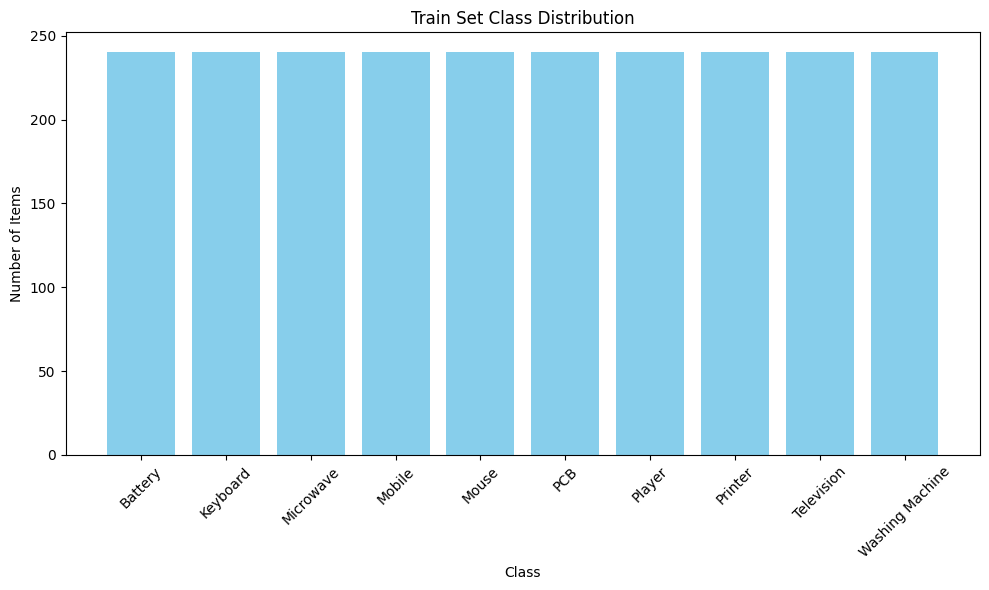

In [43]:
plot_class_distribution_image_gen(train_data, title="Train Set Class Distribution")


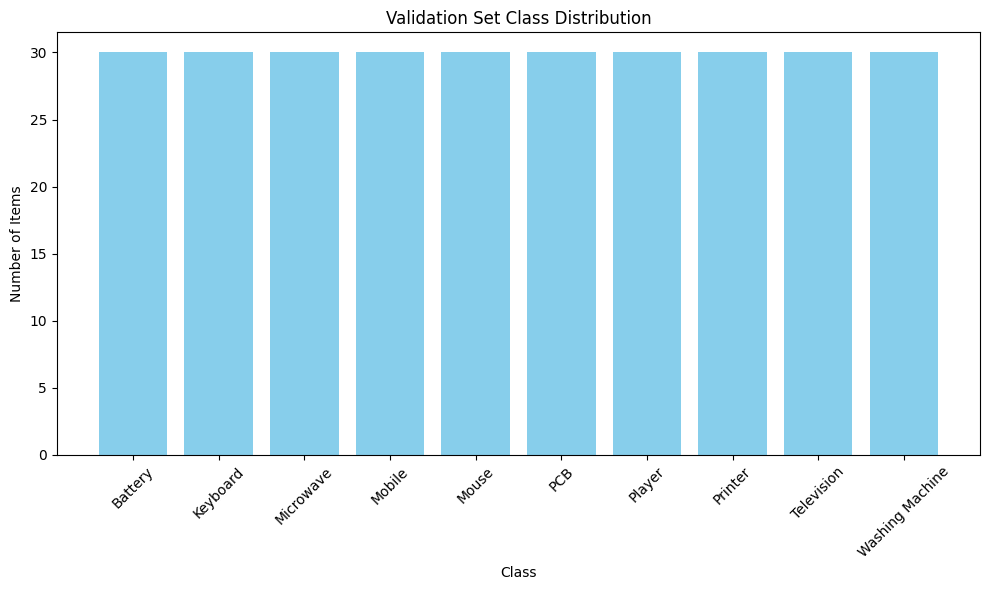

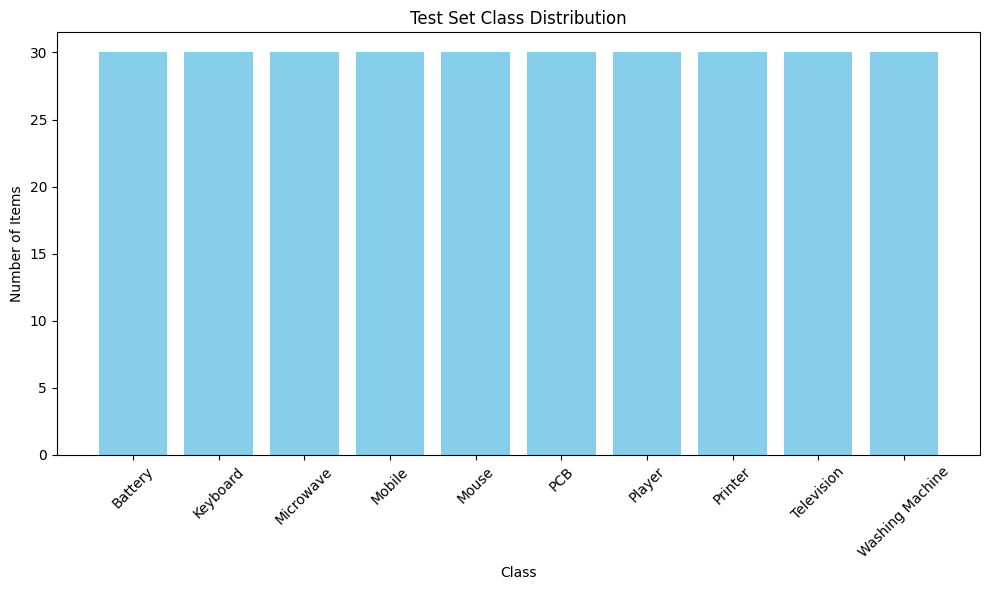

In [44]:
plot_class_distribution_image_gen(val_data, title="Validation Set Class Distribution")
plot_class_distribution_image_gen(test_data, title="Test Set Class Distribution")
